# Linear Regression for a housing dataset

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 215 (delta 102), reused 168 (delta 55), pack-reused 0
Receiving objects: 100% (215/215), 35.23 MiB | 20.89 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/machine_learning_1/linear_regression


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
#feature=number of rooms
features = np.array([1,2,3,5,6,7])
#labeles=price
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


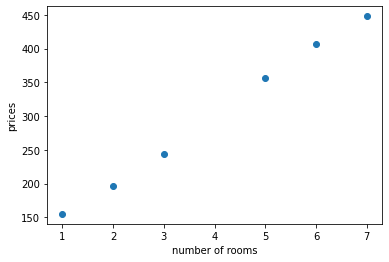

In [4]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [5]:

def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [7]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    '''implemened square_trick and return the new price_per_room and base_price
    calculate the predicted price then calculate the new price_per_room and base_price'''
  
    
    predicted_price=price_per_room*num_rooms+base_price

    base_price=base_price+learning_rate*(price-predicted_price)
    price_per_room=price_per_room+learning_rate*num_rooms*(price-predicted_price)

    return price_per_room, base_price

In [8]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    
    '''implemented absolute_trick and return the new price_per_room and base_price
    calculate the predicted price then calculate the new price_per_room and base_price'''
    predicted_price=price_per_room*num_rooms+base_price
    if price < predicted_price:
      base_price=base_price-learning_rate*(predicted_price)
      price_per_room=price_per_room-learning_rate*num_rooms
    
    elif price > predicted_price:
      base_price=base_price+learning_rate*(predicted_price)
      price_per_room=price_per_room+learning_rate*num_rooms

    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 50.89442185151939
Base price: 102.45142862669029


(50.89442185151939, 102.45142862669029)

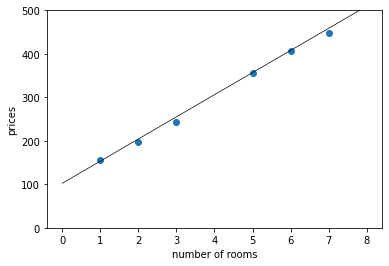

In [10]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):

    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    
    # for this number of epochs 
    # got a random datasample of our dataset(x,y)
    # using the selected datasample used square_trick fn or absolute_trick fn to update price_per_room and base_price

    for i in range(epochs+1):
          index=random.randint(0, len(features)-1)
    
          feature=features[index]
          label=labels[index]
          price_per_room,base_price=absolute_trick(base_price,price_per_room,feature,label,learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

#for the x-axis to appear in the figure
plt.ylim(0,500)
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Root mean squared error function

In [11]:
# The root mean square error function
def rmse(labels, predictions):
    '''calculate the root meen square error between the labels and predictions'''

    error= np.sqrt(np.dot(labels-predictions,labels-predictions)*(1/len(labels)))
    return error

### Plotting the error function

Price per room: 50.834065051655536
Base price: 99.98716998128174


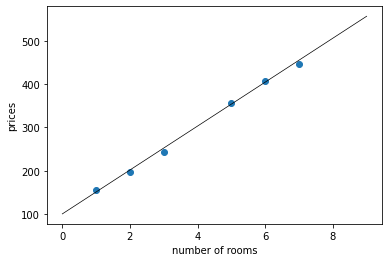

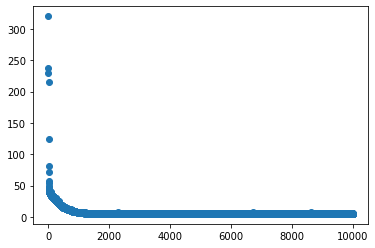

(50.834065051655536, 99.98716998128174)

In [12]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [18]:
# Use sklearn to implement linear regression that fit our data (features, labels)
from sklearn.linear_model import LinearRegression



In [19]:
features=features.reshape(-1,1)
regModel=LinearRegression().fit(features, labels)

In [20]:
# print the coefficients and bias of this model
coefficients=regModel.coef_
print(coefficients)

bias=regModel.intercept_
print(bias)


[50.39285714]
99.59523809523819


In [21]:
# use this model to predict the price of house that contains 4 rooms
predicted_price=regModel.predict(np.array([[4]]))
predicted_price

array([301.16666667])

### Normal Equation



In [22]:
def Normal_Equation(features,labels):
    # Use normal equation to get the weights

    col_ones=np.ones((len(features),1), dtype=int)
    X=np.concatenate((col_ones,features),axis=1)

    print(X)
    W=np.linalg.inv((X.transpose())@X)@(X.transpose())@labels
    bias=W[0]
    coefficients=W[1]
    return bias,coefficients

bias,coefficients = Normal_Equation(features,labels)
print(bias,coefficients)

[[1 1]
 [1 2]
 [1 3]
 [1 5]
 [1 6]
 [1 7]]
99.59523809523805 50.39285714285714
